## 워드 클라우드

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

In [11]:

from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

In [12]:
text = open('./data/wc1.alice.txt').read()
alice_mask = np.array(Image.open('./data/wc2.alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

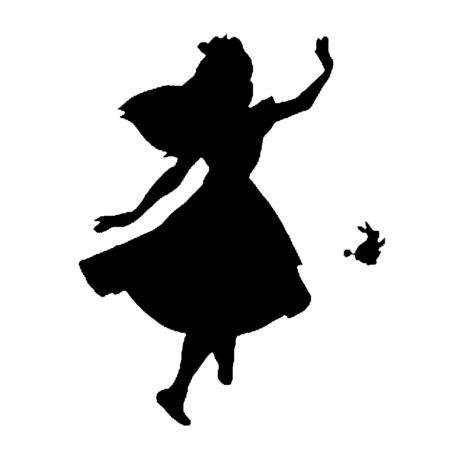

In [13]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [14]:
text_=[word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

In [18]:

wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.29508196721311475,
 'one': 0.25956284153005466,
 'know': 0.2459016393442623,
 'thing': 0.2185792349726776,
 'time': 0.2103825136612022,
 'Queen': 0.20765027322404372,
 'see': 0.1830601092896175,
 'King': 0.17486338797814208,
 'now': 0.16393442622950818,
 'went': 0.15846994535519127,
 'began': 0.15846994535519127,
 'way': 0.1557377049180328,
 'Hatter': 0.1557377049180328,
 'Mock Turtle': 0.15300546448087432,
 'say': 0.15027322404371585,
 'Gryphon': 0.15027322404371585,
 'well': 0.14754098360655737,
 'think': 0.1448087431693989,
 'quite': 0.14207650273224043,
 'much': 0.13934426229508196,
 'first': 0.13934426229508196,
 'thought': 0.1366120218579235,
 'go': 0.1366120218579235,
 'head': 0.13114754098360656,
 'What': 0.13114754098360656,
 'never': 0.1284153005464481,
 'voice': 0.12568306010928962,
 'looked': 0.12295081967213115,
 'got': 0.12295081967213115,
 'must': 0.12021857923497267,
 'Cat': 0.12021857923497267,
 'Mouse': 0.12021857923497267,
 'Duchess': 0.11

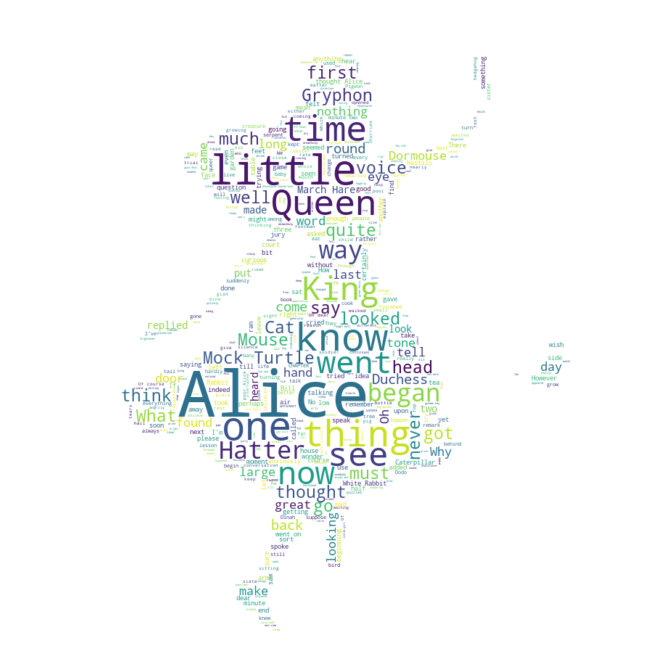

In [19]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:

text = open('./data/wc3.a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('./data/wc4. stormtrooper_mask.png'))

In [23]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [24]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [25]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

In [26]:
s = 'hsl(0, 0%%, %d%%)' % random.randint(60,100)
s

'hsl(0, 0%, 62%)'

In [27]:
# stopwords 제거
text_=[word for word in text.split() if word.lower() not in stopwords]
text = ' '.join([str(elem) for elem in text_])

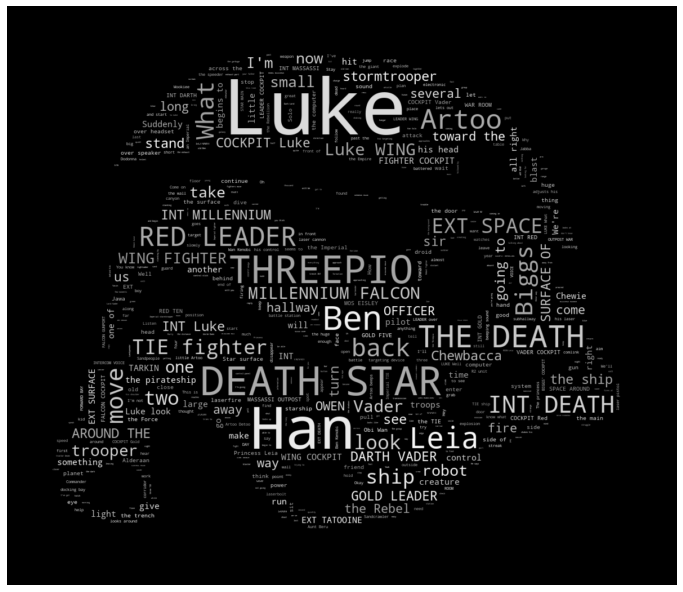

In [28]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
wc = WordCloud(background_color='white', max_words=2000, mask=mask, stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Luke': 1.0,
 'Han': 0.5138888888888888,
 'DEATH STAR': 0.4444444444444444,
 'THREEPIO': 0.4007936507936508,
 'Ben': 0.2896825396825397,
 'THE DEATH': 0.24801587301587302,
 'Leia': 0.22420634920634921,
 'Artoo': 0.19642857142857142,
 'RED LEADER': 0.1765873015873016,
 'back': 0.15079365079365079,
 'What': 0.14484126984126985,
 'Biggs': 0.13690476190476192,
 'move': 0.13690476190476192,
 'INT DEATH': 0.1349206349206349,
 'TIE fighter': 0.1349206349206349,
 'ship': 0.13293650793650794,
 'EXT SPACE': 0.13293650793650794,
 'two': 0.12698412698412698,
 'look': 0.12698412698412698,
 'MILLENNIUM FALCON': 0.12698412698412698,
 'Vader': 0.125,
 'Luke WING': 0.12301587301587301,
 'one': 0.11706349206349206,
 'trooper': 0.1111111111111111,
 'small': 0.10317460317460317,
 'now': 0.10317460317460317,
 'WING FIGHTER': 0.10317460317460317,
 'robot': 0.10119047619047619,
 'take': 0.10119047619047619,
 "I'm": 0.09523809523809523,
 'INT MILLENNIUM': 0.09325396825396826,
 'see': 0.09126984126984126,
 't

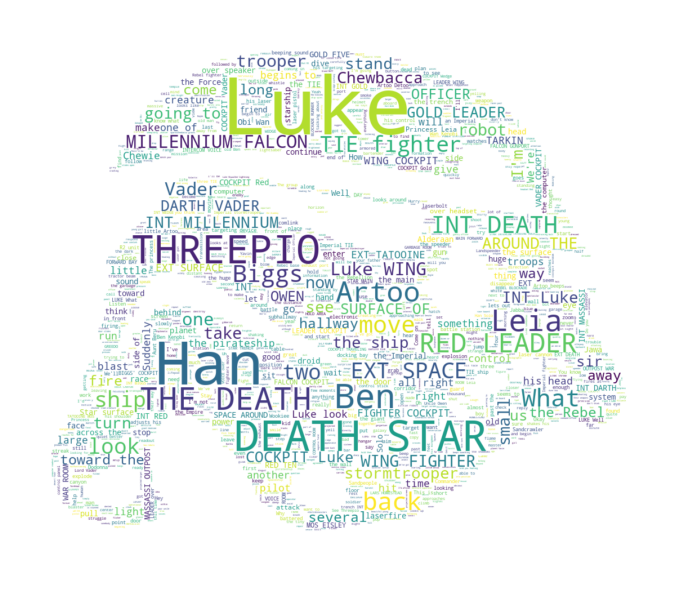

In [23]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## 지식인 분석

In [30]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [31]:
tmp1 = 'https://kin.naver.com/search/list.nhn?'
html = tmp1 + 'query={key_word}&page={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [3]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list[:5]

['\n\n천여여친 선물 추\n\n2020.06.22.\n천여여친 선물 추  저는 조금 특별한 선물 추천 드립니다 저도 흔한 선물을 다... 특별한선물 여친선물 : DAON FLOWER [DAON FLOWER] 꽃과 향을 선물하다. DAON smartstore.... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 6\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n여친선물로 뭘 줘야 할까요?\n\n2020.05.21.\n여친선물로 뭘 줘야 할까요?  안녕하세요 저는 종로3가에서 귀금속을 하고 있는 예문입니다 어떤 특별한 날인가요 그러면 특별하게 선물을 주시는 게 좋을 거 같아서요 기념이... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n아빠가 어제 카드 주셔서 여친 선물\n\n2020.02.04.\n아빠가 어제 카드 주셔서 여친 선물 사는데에 20만원 썼거든요?? 근데 여친이 또 사달라는게 있는데 그게 30만원이에요... 근데 또 돈쓰면 아빠가 뭐라 할것같고 안사주면... \n\nQ&A\n\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t > 연애, 결혼\n|\n답변수 8\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\xa0추천수 0\n\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\n',
 '\n\n정품문의 답변즘여 여친선물인데....\n\n2020.01.29.\n... 여친선물이에요... 꼼꼼히... 부탁... 드립니다... 감사합니다. 구매처링크와 제품모델명택, 자물쇠 각인도 올려주세요 꼼꼼히 확인하기엔 부족한 사진이 너무 많네요; \n\nQ&

In [32]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

C:\ProgramData\Anaconda3\envs\myenv\lib\site-packages\ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [36]:
with open("./data/wc6.present_candi.txt", "w", -1, 'utf-8') as f:
    for line in present_candi_text:
        f.write(line+'\n')

In [37]:
len(present_candi_text)

1000

In [39]:
present_text = ''

for each_line in present_candi_text:
    present_text += each_line + '\n'

In [40]:
from konlpy.tag import Okt
okt =Okt()

In [41]:
gifts = okt.nouns(present_text)
gifts[:10]

['여자친구', '선물', '여자친구', '독립', '축하', '기념', '선물', '여자친구', '선물', '양해']

In [49]:
import nltk
gifts = nltk.Text(gifts, name= '여자 친구 선물')
print(len(gifts.tokens))
print(len(set(gifts.tokens)))

23572
681


In [50]:
gifts.vocab().most_common(100)

[('선물', 2992),
 ('여자친구', 2942),
 ('목걸이', 2607),
 ('답변', 1031),
 ('수', 1005),
 ('추천', 938),
 ('때', 878),
 ('중', 865),
 ('용', 865),
 ('참고', 860),
 ('하트', 860),
 ('다이아', 859),
 ('티니', 859),
 ('인기', 858),
 ('완전', 856),
 ('연애', 512),
 ('결혼', 368),
 ('고민', 299),
 ('이성', 142),
 ('상담', 142),
 ('쥬니버', 130),
 ('네이버', 126),
 ('용법', 126),
 ('가족', 86),
 ('이벤트', 86),
 ('행사', 83),
 ('고', 76),
 ('초', 75),
 ('내공', 75),
 ('중학생', 68),
 ('문구', 67),
 ('만년필', 65),
 ('미술', 65),
 ('용품', 65),
 ('좀', 46),
 ('제', 37),
 ('화장품', 34),
 ('뭐', 31),
 ('생각', 27),
 ('화이트데이', 21),
 ('걸', 20),
 ('요', 20),
 ('저', 19),
 ('생일', 19),
 ('것', 16),
 ('여자', 16),
 ('이번', 16),
 ('가격', 16),
 ('거', 15),
 ('크리스마스', 15),
 ('지갑', 15),
 ('로', 13),
 ('질문', 13),
 ('향수', 13),
 ('뭘', 12),
 ('게', 11),
 ('꽃', 11),
 ('반지', 11),
 ('쇼핑', 11),
 ('감동', 10),
 ('살', 10),
 ('커플', 10),
 ('브랜드', 9),
 ('진짜', 9),
 ('의미', 9),
 ('곧', 9),
 ('정도', 9),
 ('전', 9),
 ('목도리', 9),
 ('중반', 8),
 ('이제', 8),
 ('팔찌', 8),
 ('줄', 7),
 ('기초', 7),
 ('귀걸이', 7),
 ('달', 7),
 (

In [54]:
sw_text = ' '.join([str(elem) for elem in set(gifts.tokens)])
print(sw_text)

주 커플티 이성 백 카드 주위 용산 수제 최고 대학 더 따뚜아쥬 욕설 연락 제이콥 예비 결혼 가방 럼 어쨌든 쥬니버 사람 러브레터 전역 다른 꿈 반지 존경 편지 만 옷 지갑 브랜드 입생로랑 선물 제품 의미 비밀연애 성의 체크 괸찮치만 결과 고 이 대도 주년 막상 스카프 플라워 언니 기 애니메이션 좀 꽃다발 속옷 요 시구 뒤 영상 톰 악세사리 가족 정성 메모리 래서 아이디어 별로 때문 화이트데이 내내 일단 오즈 브드 경우 치 미만 줄 순간 셀 플립 샤넬 말 건조과일 쿠키 오락 동안 철 땜 모바일폰 공주 백화점 글구 호 하여튼 파티 귀걸이 스팅 가장 활용 언제 생활 드림캐쳐 봣 갤럭시 기억 초딩 명품 전화 이벤트 무난 뭘 생각 정해 자몽 연인 네 재료 등등 금 건강 오늘 답변 도움 중학생 목도리 쇼 플랫슈즈 외 펄찌 대비 문제 항상 택배 벨트 풍속 점점 토 겸 누가 슬 자 마크 틴트 다이아 서도 거 취업 세럼 한지 전후 소나기 행사 티셔츠 포에버 가격 포토 남성 시내 오세아니아 감동 처럼 영구 상큼 무협 여러가지 여자 리스트 친구 금함 비타민 이틀 이니스프리 신발 사양 니트 채팅 주문 실용 여름 꽃 함 교환학생 지식 이제 크리스마스 향기 떄 독립 펜던트 장미 상품 디자인 피부 양해 만원 도대체 미술 등 조언 고해 색깔 괜찬을듯해 이번 가전 얼굴 방학 테크 메이크업 텀블러 상자 데 초반 하트 현재 중지 우선 연애 대면 매 산물 첫 라면 입문 박 네이션 접 초등학교 쭈니 둿 종류 행정 확행 중고 티나 인 해도 이자 노트북 준비 왜 끼 글 방송 중동 거나 대학생 하루 블랙베리 손바닥 다시 로 군 저 마카롱 커플 손가락 케이스 너클 기념일 빵 초 취미 살껀데 가요 세시 폭시 루 당장 다담 용법 전부 자주 하카 위 가지 맛 여동생 그것 영양 밥 여친 에스티 발렌타인데이 향 제주도 사람과 뭐 캠코더 서울 일 핸드 기타 액션 술 발찌 홀로 연말 아래 볶음 가디건 지식인 혹시 기분 분 루이비통 집업 르블랑 이중 적극 후반 안 를 적 정 교통 음 며칠 윈도우 덕후 완전 리버 신경

In [55]:
sw_text = '''별로 생일 반 직업 고생 취미 도대체 군대 쪼금 여친 재료 곳 
 만원 인 성인 사업자 한번 전여자친구 전 확인 리얼 연상연하 햇빛 후 풍속
 애 럼 괸찮치만 한민 언제 하여튼 동안 자주 호가 살이 겟잇뷰티 데이트 
 저 머 실용 전역 욕설 정도 매 둿 슬 연인 통화 먼저 음 줄 만들기 살껀데
  비밀연애 가을 무슨 게이 포함 때 컬러 로 섬유 손바닥 브랜드 준비 크게
  드림 성의 팟 블랙 자 하니 고 가성 점점 대학생 제대로 셀 윈도우 
  쪽 방학 공주 구류 아이디어 의식 사서 최근 남성 여자 주위 음질 신발
  미만 중후 현재 중고 피 정성 제격 산물 시티 신경 중지 요 독립 사이트
  겸 매일 반나절 용도 중국 서울 퍼온거 이 얼마 바 완전 그것 의견 일찍
  센스 일 점 청계 맛 조언 좀 검 기념 지역 고수 오빠 전부 초반 네이버
  상큼 순간 당장 기 최대 연애 축하 부담 추억 고해 고급 안 은행 빼빼로데이
  벌써 교환학생 타이밍 만 스 신고 다시 결혼 리스트 하루 해도 친구 용 티
  시내 그룹 거의 강남 의미 개 대면 시간 사양 용산 병영 셜 건 기초 수제
  보증 실버 움 진 사려 방송 친 가격 뒤 선물 잡화 우편 기타 여러가지 토 거
  화이트데이 얘기 결과 예상 기도 이직 둘 은근 말씀 명절 날 백화점 해주시
  주년 참고 대학 쭈니 달 장미 대요 고향 준 용법 지방선거 나중 거도 군 말
  오늘 값 빼 사주면 꿈 선 생각 봣 게 대해 후반 작업 가장 교통 이벤트 찬
  아래 잡고 일주일 꼭 이자 얼굴 치 번 도움 수수 남자 사람과 여자친구 날씨
  소개 마음 뭘 막상 친한친구 질문 초딩 용품 양산 힘 저녁 일단 졸업식
  제일 리버 첫 해 려고 를 주니 상품 수 다음 감동 행사 비 부 크리스마스
  계절 편도 문제 채팅 상담 인기 직접 그동안 중 기억 마디 상자 원래 종류
  분 박 밥 동갑 관리 색상 철 행정 연락 메모리 이제 덕후 무협 가요 하트
  저가 제주도 달달 답변 쥬니버 다음주 파티 초등학생 연말 탈취 때문 학교생활
  저번 부분 진주 해주 누가 베스트 접 정말 정해 요즘 여름 버스 내공 한지
  때매 목 대도 길찾기 기념일 곧 종합 광장 제 모델 뭐 가기 활용 안나 빨강
  양해 원데이 데 강추 루 홀로 외 차라리 네 의류 학기 티셔츠 주 학년 색깔
  손가락 피부 살 언니 땜 중학생 이성 처음 님들 부모님 혹시 제외 건강 생활
  소나기 추천 우정 미리 등 광역 더 떄 왜 택배 예비 고요 백 금함 중반 조금
  며칠 이요 이번 겨울 라면 끼 항상 송이 고민 전화 테크 함 액션 저기 기분
  무엇 고삼 주문 빵 처럼 홍 커플 거리 용인 브드 체크 오락 팩트 여행 그냥
  쇼핑 포장 그 체형 전문 졸업 내내 지식인 근방 확행 정식 핸드 부탁 초등학교
  그게 현금 회사 한편 경우 이하 가족 이중 학생 어쨌든 대충 여성 화장 영상
  영구 발렌타인 너 하루하루 최고 꽃집 지금 토닥토닥 세트 이틀 사람 걸
  볶음 제품 코미디 모두 하나 사랑 사실 지식 놀이 등등 발렌타인데이 진짜
  플립 데이 적극 민원 재회 존경 시구 무료 행동 고등학교 대비 인터넷 서여
  립스틱 위 나이 김 쇼 글구 구 무난 것 색 성분  일주년 메이커 다른 우선
  정 여동생 계획 서도 이름 거나 맥 입문 또 이내 발레 여의 취업 중동 가게
  이면 전후 고등학생 초소 적 메세지 괜찬을듯해'''

In [56]:
stop_words = sw_text.split()

In [57]:
text_ = [gift for gift in gifts if gift not in stop_words]

In [58]:
gifts = nltk.Text(text_, name='여자 친구 선물')
gifts.vocab().most_common(50)

[('목걸이', 2607),
 ('다이아', 859),
 ('티니', 859),
 ('초', 75),
 ('문구', 67),
 ('만년필', 65),
 ('미술', 65),
 ('화장품', 34),
 ('지갑', 15),
 ('향수', 13),
 ('꽃', 11),
 ('반지', 11),
 ('목도리', 9),
 ('팔찌', 8),
 ('귀걸이', 7),
 ('편지', 7),
 ('펜던트', 6),
 ('가방', 6),
 ('손편지', 6),
 ('옷', 5),
 ('명품', 5),
 ('패션', 5),
 ('투맨', 5),
 ('전자담배', 4),
 ('글', 4),
 ('속옷', 4),
 ('이어폰', 4),
 ('공예', 4),
 ('초콜릿', 4),
 ('루이비통', 4),
 ('하카', 3),
 ('시계', 3),
 ('다이어트', 3),
 ('루이까또즈', 3),
 ('벨트', 3),
 ('넥타이', 3),
 ('다담', 3),
 ('틴트', 3),
 ('피어싱', 3),
 ('류량', 3),
 ('노트북', 3),
 ('뷰티', 2),
 ('쿠키', 2),
 ('생로랑', 2),
 ('샤넬', 2),
 ('네이션', 2),
 ('주류', 2),
 ('핸드폰', 2),
 ('갤럭시', 2),
 ('아이폰', 2)]

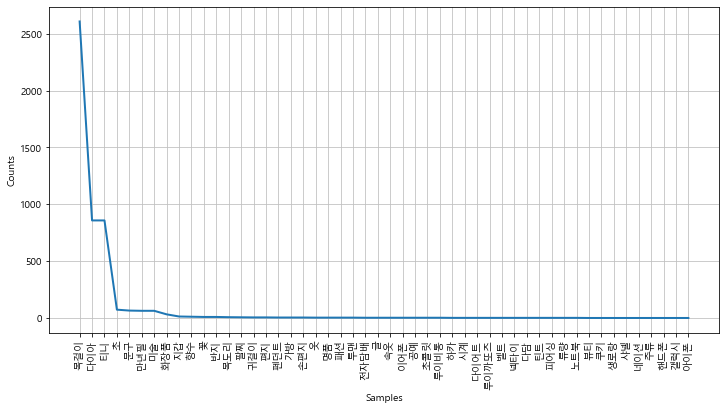

In [59]:
plt.figure(figsize=(12,6))
gifts.plot(50) 
plt.show()

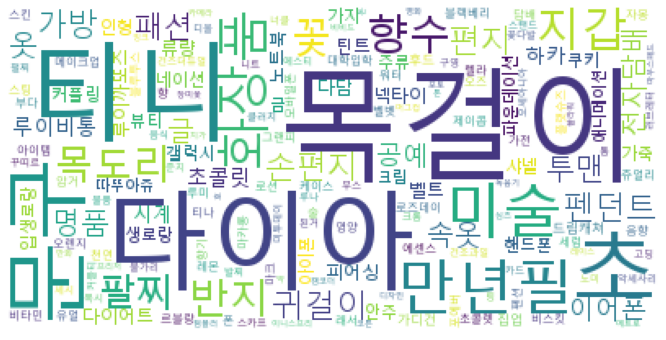

In [60]:
data = gifts.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [61]:
mask = np.array(Image.open('data/wc5.heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [62]:
data = gifts.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

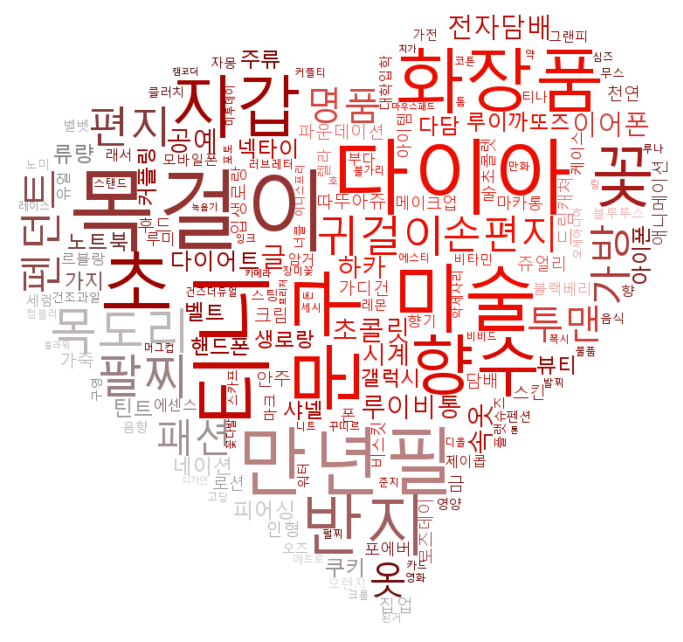

In [63]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()